In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os,sys
import pylab as plt
%matplotlib inline
from pylab import get_cmap
import glob


In [2]:
src_dir = '../src'
sys.path.append(src_dir)
from jsd import jsdalpha

In [3]:
src_meta = '../../gutenberg-frozen-2018-07-18/src/'
sys.path.append(src_meta)
from metaquery import meta_query


In [4]:
# Load meta data

In [14]:
meta=meta_query(path=src_meta+'../metadata/metadata.csv')


# Find all books of a given language

In [6]:
meta.reset()

In [7]:
c_languages = meta.get_lang_counts()

In [8]:
arr_n = []
arr_l = []
for l,n in c_languages.most_common():
    arr_n += [n]
    arr_l += [l]
arr_n = np.array(arr_n)
arr_l = np.array(arr_l)

In [9]:
arr_n

array([45282,  2830,  1875,  1618,   780,   714,   581,   550,   438,
         219,   182,   173,   118,   113,    68,    60,    33,    31,
          20,    19,    12,    10,     7,     6,     6,     6,     5,
           5,     5,     4,     4,     3,     3,     3,     3,     3,
           3,     2,     2,     2,     2,     2,     2,     2,     2,
           2,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     1,     1,     1,     1,     1,     1,     1,     1,
           1])

In [10]:
arr_l

array(['en', 'fr', 'fi', 'de', 'nl', 'it', 'es', 'pt', 'zh', 'el', 'sv',
       'hu', 'eo', 'la', 'da', 'tl', 'ca', 'pl', 'ja', 'no', 'cy', 'cs',
       'is', 'enm', 'fur', 'te', 'bg', 'he', 'ru', 'ang', 'af', 'nai',
       'sr', 'nah', 'ilo', 'ceb', 'grc', 'ro', 'myn', 'ga', 'fy', 'mi',
       'nav', 'arp', 'gla', 'brx', 'sa', 'ale', 'kha', 'ia', 'kld', 'oc',
       'nap', 'gl', 'br', 'iu', 'bgs', 'csb', 'rmr', 'sl', 'oji', 'ar',
       'et', 'fa'], dtype='<U3')

In [37]:
# i_l = 0
# l = arr_l[i_l]
path_text = os.path.abspath(os.path.join(src_meta,os.pardir,'data','counts'))

list_n_tokens = []
for i_l,l in enumerate(arr_l):
    print(l)
    n_tokens = 0
    meta.reset()
    meta.filter_lang(l)
    list_books = meta.get_ids()
    for pg_id in list_books:
        filename = os.path.join(path_text,'%s_counts.txt'%(pg_id))
        with open(filename) as f:
            x = f.readlines()
        if len(x)>1:
            list_n = [int(h.split()[1]) for h in x]
            N = sum(list_n)
            n_tokens+=N
    list_n_tokens += [n_tokens]


en
fr
fi
de
nl
it
es
pt
zh
el
sv
hu
eo
la
da
tl
ca
pl
ja
no
cy
cs
is
enm
fur
te
bg
he
ru
ang
af
nai
sr
nah
ilo
ceb
grc
ro
myn
ga
fy
mi
nav
arp
gla
brx
sa
ale
kha
ia
kld
oc
nap
gl
br
iu
bgs
csb
rmr
sl
oji
ar
et
fa


In [38]:
list_n_tokens

[2823723318,
 169923386,
 66732341,
 71829281,
 42796387,
 42876256,
 35617141,
 13323772,
 346926,
 7684828,
 7568272,
 8528168,
 2000935,
 3556251,
 3909339,
 1007759,
 1178446,
 412504,
 5341,
 750424,
 210188,
 359439,
 80045,
 238227,
 356390,
 10253,
 33278,
 114523,
 48897,
 0,
 150653,
 0,
 69261,
 3172,
 4817,
 23728,
 0,
 209702,
 7841,
 112714,
 24953,
 3664,
 0,
 14632,
 15314,
 0,
 1417,
 0,
 0,
 6117,
 0,
 3820,
 35629,
 4846,
 80022,
 16310,
 0,
 0,
 23309,
 18211,
 10974,
 509,
 11955,
 21177]

# Plot

In [39]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.titlesize':16,
          'axes.labelsize': 14,
          'text.fontsize': 12,
          'legend.fontsize': 12,
#           'figtext.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False
         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


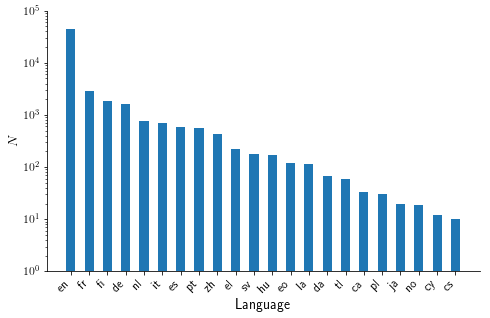

In [49]:
## restrict to e.g. more than 10 books!
## we could do the remaining in an inset

indmax = 22#len(arr_n)



# f=plt.figure(figsize = (10,20))
f=plt.figure()
ax=f.add_subplot(1,1,1)

x = np.arange(indmax)
y = arr_n[:indmax]
z = arr_l[:indmax]
ax.bar(x,y,width = 0.5,label='No. books')

ax.set_xlabel(r'Language')
ax.set_ylabel(r'$N$')

ax.set_xticks(x)
ax.set_xticklabels(z,rotation=45, ha='right')

# ax.set_xlim(1500,2015)
# ax.set_ylim(1,10**5)

ax.set_ylim(1,10**5)
# ax.set_xscale('log')
ax.set_yscale('log')
# plt.subplots_adjust(left=0.1,bottom=0.4)

path_save = os.path.join(os.pardir,'figures')
fname_save = 'basicstats-language.pdf'
filename = os.path.join(path_save,fname_save)
# plt.savefig(filename)

In [105]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.titlesize':16,
          'axes.labelsize': 14,
          'text.fontsize': 12,
          'legend.fontsize': 12,
#           'figtext.fontsize': 12,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12,
          
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : True,
          'axes.spines.top' : False
         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


In [106]:
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

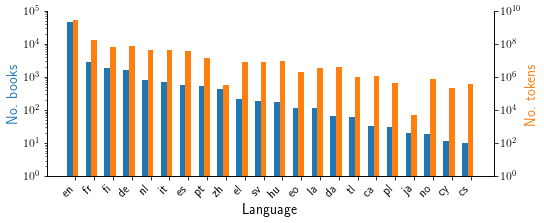

In [107]:
## restrict to e.g. more than 10 books!
## we could do the remaining in an inset

indmax = 22#len(arr_n)
cmap = get_cmap('tab10')


# f=plt.figure(figsize = (10,20))
f=plt.figure()
ax=f.add_subplot(1,1,1)


ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis





c0 = cmap(0)
x = np.arange(indmax)+0.2
y = arr_n[:indmax]
z = arr_l[:indmax]
p1 =ax.bar(x,y,width = 0.3,label='No. books',color=c0)

c1 = cmap(1)
x = np.arange(indmax)+0.5
y = list_n_tokens[:indmax]
z = arr_l[:indmax]
p2=ax2.bar(x,y,width = 0.3,label='No. tokens',color=c1)


ax.set_xlabel(r'Language')
ax.set_ylabel(r'No. books',color=c0)



ax.set_xticks(x)
ax.set_xticklabels(z,rotation=45, ha='right')

# ax.set_xlim(1500,2015)
# ax.set_ylim(1,10**5)

ax.set_ylim(1,10**5)
# ax.set_xscale('log')
ax.set_yscale('log')

ax2.set_ylim(1,10**10)
# ax.set_xscale('log')
ax2.set_yscale('log')


ax2.set_ylabel('No. tokens',color=c1)
ax2.set_ylim(10**0,10**10)



plt.subplots_adjust(left=0.1,bottom=0.4)


path_save = os.path.join(os.pardir,'figures')
fname_save = 'basicstats-language-tokens.pdf'
filename = os.path.join(path_save,fname_save)
plt.savefig(filename)